In [12]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

width = 12
height = 7
plt.rcParams["figure.figsize"] = (width, height)

import pandas as pd
import numpy as np
import tflscripts
from tflscripts import boxplot_by, scatter_plot_by, heatmap_by
import json
import pickle
import seaborn as sns

configuration = tflscripts.read_configuration()
df = pd.read_pickle('results.p')

df = df.loc[df.type_of_transfer == 'No transfer']

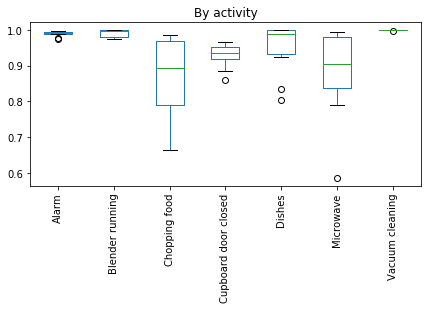

In [2]:
plt.rcParams["figure.figsize"] = (7, 3)

df_plot = df.loc[df.source_device_type == 'Mite']
df_plot = df_plot.loc[df.target_device_type == 'Mite']
df_plot = df_plot.loc[df.label.isin([
    'Alarm', 'Blender running', 'Vacuum cleaning',
    'Chopping food', 'Dishes', 'Microwave',  'Cupboard door closed'
])]

boxplot_by('label',
           value_column='f1',
           label=None,
           features='All',
           classifier='SVM',
           title='By activity',
           df_plot=df_plot)

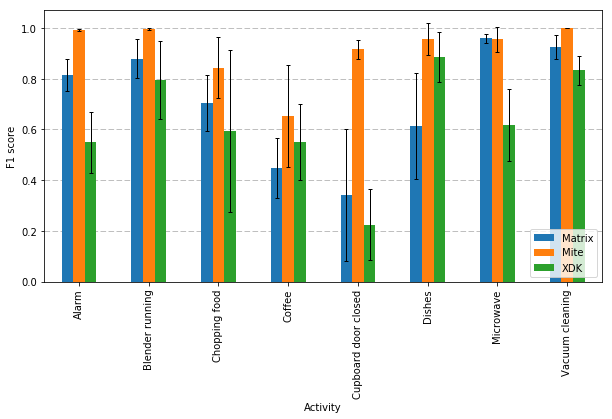

In [9]:
plt.rcParams["figure.figsize"] = (10, 5)

df_plot = df.loc[df.label.isin([
    'Alarm', 'Blender running', 'Vacuum cleaning', 'Coffee',
    'Chopping food', 'Dishes', 'Microwave',  'Cupboard door closed'
])]
df_plot = df_plot.loc[df_plot.classifier == 'SVM']
df_plot = df_plot.loc[df_plot.features_name == 'All']
df_plot = df_plot.loc[df_plot.source_room == 'synergy']
df_plot = df_plot.loc[df_plot.target_room == 'synergy']

means = df_plot.groupby(['source_device_type', 'label'])['f1'].mean()
means = means.reset_index()
means = means.rename(columns={'source_device_type': 'Sensor type', 'label': 'Activity'})
means = means.pivot(index='Activity', columns='Sensor type', values='f1')

errors = df_plot.groupby(['source_device_type', 'label'])['f1'].std()
errors = errors.reset_index()
errors = errors.rename(columns={'source_device_type': 'Sensor type', 'label': 'Activity'})
errors = errors.pivot(index='Activity', columns='Sensor type', values='f1')

ax = means.plot.bar(yerr=errors,
              error_kw=dict(lw=1, capsize=2, capthick=1))
ax.set_axisbelow(True)
ax.yaxis.grid(linestyle='dashed',)
plt.legend(loc=4)
plt.ylabel('F1 score')

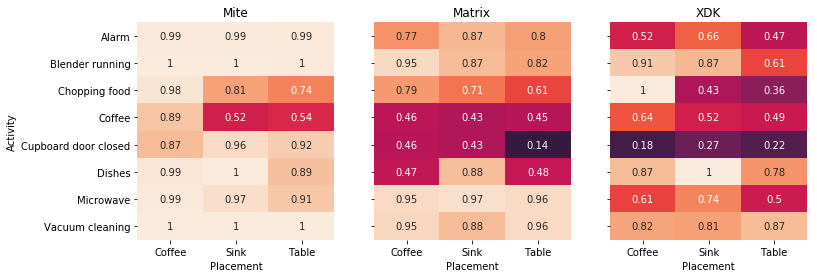

In [39]:
plt.rcParams["figure.figsize"] = (12, 4)

df_plot = df.loc[df.label.isin([
    'Alarm', 'Blender running', 'Vacuum cleaning', 'Coffee',
    'Chopping food', 'Dishes', 'Microwave',  'Cupboard door closed'
])]
df_plot = df_plot.loc[df_plot.classifier == 'SVM']
df_plot = df_plot.loc[df_plot.features_name == 'All']
df_plot = df_plot.loc[df_plot.source_room == 'synergy']

f, axes = plt.subplots(1, 3, sharex=False, sharey=True)

for i, device_type in enumerate(df_plot.source_device_type.unique()):
    _df_plot = df_plot.loc[df_plot.source_device_type == device_type]

    means = _df_plot.groupby(['source_placement', 'label'])['f1'].mean()
    means = means.reset_index()
    sns.heatmap(means.pivot_table(columns='source_placement', index='label', values='f1'),
                ax=axes[i], cbar=False, annot=True, vmin=0, vmax=1)
    axes[i].set_title(device_type)

    if i == 0:
        axes[i].set_ylabel('Activity')
    else:
        axes[i].set_ylabel('')
        
    axes[i].set_xlabel('Placement')

In [15]:
means

source_device_type  label               
Matrix              Alarm                   0.814177
                    Blender running         0.879237
                    Chopping food           0.704589
                    Coffee                  0.448850
                    Cupboard door closed    0.343094
                    Dishes                  0.613250
                    Microwave               0.960018
                    Vacuum cleaning         0.925568
Mite                Alarm                   0.992516
                    Blender running         0.996983
                    Chopping food           0.843926
                    Coffee                  0.652186
                    Cupboard door closed    0.916350
                    Dishes                  0.956852
                    Microwave               0.954697
                    Vacuum cleaning         1.000000
XDK                 Alarm                   0.549960
                    Blender running         0.794998
     